In [1]:
from rover_utils import RoverDomain, PointBSpline, ConstObstacleCost, NegGeom, AABoxes, UnionGeom, AdditiveCosts, \
    ConstCost
import numpy as np
import matplotlib.pyplot as plt
from rover_utils import plot_2d_rover
from rover_utils import GMCost
from ebo_core.helper import ConstantOffsetFn, NormalizedInputFn
import torch

In [2]:
#######################################################
def create_cost_large():
    c = np.array([
                  [0.43143755, 0.20876147],
                  [0.38485367, 0.39183579],
                  [0.02985961, 0.22328303],
                  [0.7803707, 0.3447003],
                  [0.93685657, 0.56297285],
                  [0.04194252, 0.23598362],
                  [0.28049582, 0.40984475],
                  [0.6756053, 0.70939481],
                  [0.01926493, 0.86972335],
                  [0.5993437, 0.63347932],
                  [0.57807619, 0.40180792],
                  [0.56824287, 0.75486851],
                  [0.35403502, 0.38591056],
                  [0.72492026, 0.59969313],
                  [0.27618746, 0.64322757],
                  [0.54029566, 0.25492943],
                  [0.30903526, 0.60166842],
                  [0.2913432, 0.29636879],
                  [0.78512072, 0.62340245],
                  [0.29592116, 0.08400595],
                  [0.87548394, 0.04877622],
                  [0.21714791, 0.9607346],
                  [0.92624074, 0.53441687],
                  [0.53639253, 0.45127928],
                  [0.99892031, 0.79537837],
                  [0.84621631, 0.41891986],
                  [0.39432819, 0.06768617],
                  [0.92365693, 0.72217512],
                  [0.95520914, 0.73956575],
                  [0.820383, 0.53880139],
                  [0.22378049, 0.9971974],
                  [0.34023233, 0.91014706],
                  [0.64960636, 0.35661133],
                  [0.29976464, 0.33578931],
                  [0.43202238, 0.11563227],
                  [0.66764947, 0.52086962],
                  [0.45431078, 0.94582745],
                  [0.12819915, 0.33555344],
                  [0.19287232, 0.8112075],
                  [0.61214791, 0.71940626],
                  [0.4522542, 0.47352186],
                  [0.95623345, 0.74174186],
                  [0.17340293, 0.89136853],
                  [0.04600255, 0.53040724],
                  [0.42493468, 0.41006649],
                  [0.37631485, 0.88033853],
                  [0.66951947, 0.29905739],
                  [0.4151516, 0.77308712],
                  [0.55762991, 0.26400156],
                  [0.6280609, 0.53201974],
                  [0.92727447, 0.61054975],
                  [0.93206587, 0.42107549],
                  [0.63885574, 0.37540613],
                  [0.15303425, 0.57377797],
                  [0.8208471, 0.16566631],
                  [0.14889043, 0.35157346],
                  [0.71724622, 0.57110725],
                  [0.32866327, 0.8929578],
                  [0.74435871, 0.47464421],
                  [0.9252026, 0.21034329],
                  [0.57039306, 0.54356078],
                  [0.56611551, 0.02531317],
                  [0.84830056, 0.01180542],
                  [0.51282028, 0.73916524],
                  [0.58795481, 0.46527371],
                  [0.83259048, 0.98598188],
                  [0.00242488, 0.83734691],
                  [0.72505789, 0.04846931],
                  [0.07312971, 0.30147979],
                  [0.55250344, 0.23891255],
                  [0.51161315, 0.46466442],
                  [0.802125, 0.93440495],
                  [0.9157825, 0.32441602],
                  [0.44927665, 0.53380074],
                  [0.67708372, 0.67527231],
                  [0.81868924, 0.88356194],
                  [0.48228814, 0.88668497],
                  [0.39805433, 0.99341196],
                  [0.86671752, 0.79016975],
                  [0.01115417, 0.6924913],
                  [0.34272199, 0.89543756],
                  [0.40721675, 0.86164495],
                  [0.26317679, 0.37334193],
                  [0.74446787, 0.84782643],
                  [0.55560143, 0.46405104],
                  [0.73567977, 0.12776233],
                  [0.28080322, 0.26036748],
                  [0.17507419, 0.95540673],
                  [0.54233783, 0.1196808],
                  [0.76670967, 0.88396285],
                  [0.61297539, 0.79057776],
                  [0.9344029, 0.86252764],
                  [0.48746839, 0.74942784],
                  [0.18657635, 0.58127321],
                  [0.10377802, 0.71463978],
                  [0.7771771, 0.01463505],
                  [0.7635042, 0.45498358],
                  [0.83345861, 0.34749363],
                  [0.38273809, 0.51890558],
                  [0.33887574, 0.82842507],
                  [0.02073685, 0.41776737],
                  [0.68754547, 0.96430979],
                  [0.4704215, 0.92717361],
                  [0.72666234, 0.63241306],
                  [0.48494401, 0.72003268],
                  [0.52601215, 0.81641253],
                  [0.71426732, 0.47077212],
                  [0.00258906, 0.30377501],
                  [0.35495269, 0.98585155],
                  [0.65507544, 0.03458909],
                  [0.10550588, 0.62032937],
                  [0.60259145, 0.87110846],
                  [0.04959159, 0.535785]
                  ])

    l = c - 0.025
    h = c + 0.025

    r_box = np.array([[0.5, 0.5]])
    r_l = r_box - 0.5
    r_h = r_box + 0.5

    trees = AABoxes(l, h)
    r_box = NegGeom(AABoxes(r_l, r_h))
    obstacles = UnionGeom([trees, r_box])

    start = np.zeros(2) + 0.05
    goal = np.array([0.95, 0.95])

    costs = [ConstObstacleCost(obstacles, cost=20.), ConstCost(0.05)]
    cost_fn = AdditiveCosts(costs)
    return cost_fn, start, goal


def create_large_domain(dim,
                        force_start=False,
                        force_goal=False,
                        start_miss_cost=None,
                        goal_miss_cost=None):
    
    cost_fn, start, goal = create_cost_large()

    n_points = int(dim/2) 
    traj = PointBSpline(dim=2, num_points=n_points)
    
    # np.random.seed(43)

    domain = RoverDomain(cost_fn,
                         start=start,
                         goal=goal,
                         traj=traj,
                         start_miss_cost=start_miss_cost,
                         goal_miss_cost=goal_miss_cost,
                         force_start=force_start,
                         force_goal=force_goal,
                         s_range=np.array([[-0.1, -0.1], [1.1, 1.1]]))
    return domain

def l2cost_original(x, point):
        return 10 * np.linalg.norm(x - point, 2)
    
def Rover_original(X,dim):
        
        X = X.numpy().reshape(-1,dim)
        
        cost_holder = []

        domain = create_large_domain(dim=dim,
                                     force_start=True,
                                    force_goal=True,
                                    start_miss_cost=l2cost_original,
                                    goal_miss_cost=l2cost_original)
        
        
        
        n_points = domain.traj.npoints
        raw_x_range = np.repeat(domain.s_range, n_points, axis=1)
        f_max = 5.0
        f = ConstantOffsetFn(domain, f_max)
        f = NormalizedInputFn(f, raw_x_range)

        for x in X:
                
                cost_holder.append(-f(x))
        
        # for x in X:
        #         domain.set_params(x)
        #         cost_holder.append(domain.estimate_cost())
                
        return torch.tensor(cost_holder)
    

class rover_original:
    
    def __init__(self,dim,negate=False):
        
        self.dim = dim
        
        self.bounds = torch.tensor(np.array([[-0.1,1.1]*dim]).reshape(dim,2).T)
        
        self.negate = negate
        
    def __call__(self, X):
        val = Rover_original(X,self.dim)
        
        return val

np.random.seed(0)
rover_original(dim=8)(torch.tensor([[0.1,0.2,1,1,2.0,-0.1,1.2,1.8],
                   [1.,0.9,1.5,1.1,2.0,-0.05,1.1,1.24]]).reshape(-1,8))


rover_original(dim=8)(torch.tensor([0.2757,0.3631,0.3959,0.0582,0.2037,0.8855,0.7829,0.3208]))

tensor([-3.5123], dtype=torch.float64)

traj cost: 6.480677182104402


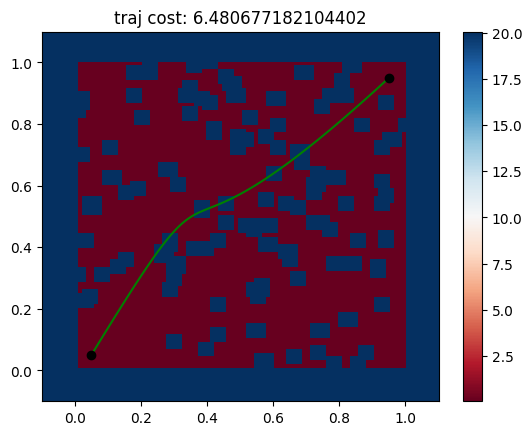

In [115]:
cost_fn, start, goal = create_cost_large()

n_points = int(30/2) 
traj = PointBSpline(dim=2, num_points=n_points)
p = np.random.uniform(np.array([-0.]*30), np.array([1.]*30)).reshape(-1,2)
traj.set_params(params=p.flatten())
traj.set_params(torch.tensor([0.2757,0.3631,0.3959,0.0582,0.2037,0.8855,0.7829,0.3208]),start=start, goal=goal)
#traj.set_params(params=p.flatten(), start=start, goal=goal)

domain = RoverDomain(cost_fn,
                        start=start,
                        goal=goal,
                        traj=traj,
                        start_miss_cost=l2cost_original,
                        goal_miss_cost=l2cost_original,
                        force_start=False,
                        force_goal=False,
                        s_range=np.array([[-0.1, -0.1], [1.1, 1.1]]))

plt.figure()
plot_2d_rover(domain)

traj cost: 6.518580261290929


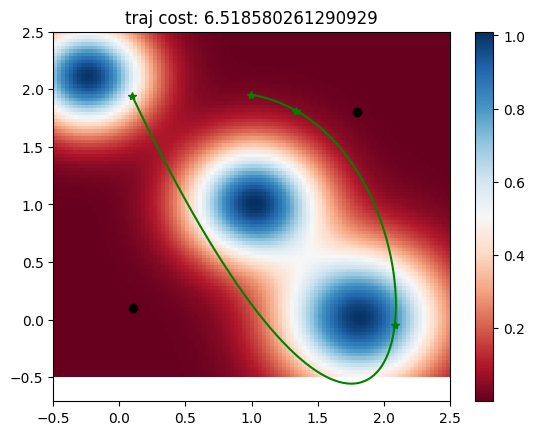

In [44]:
def l2cost(x, point):
        return 1. * np.linalg.norm(x - point, 1)#+np.linalg.norm(x - point, 2)**2
    

        
center = np.array([[1., 1.], [1.8, 0.0],[-0.25, 2.1]])
sigma = np.array([0.5,0.6,0.45]) 

cost_fn = GMCost(center, sigma)
start = np.zeros(2) + 0.1
goal = np.ones(2) * 2 - 0.2

    
    

traj = PointBSpline(dim=2, num_points=4)
# p = np.array([[0.1, 0.5], [0.3, 1.3], [0.75, 1.2]])
# traj.set_params(params=p.flatten(), start=start, goal=goal)

space_range = np.array([[-0.5, -0.5], [2.5, 2.5]])
p = np.random.uniform(np.array([-0.5]*8), np.array([2.5]*8)).reshape(-1,2)
traj.set_params(params=p.flatten())
#traj.set_params(params=p.flatten(), start=start, goal=goal)



domain = RoverDomain(cost_fn,
                        start=start,
                        goal=goal,
                        traj=traj,
                        start_miss_cost=l2cost,
                        goal_miss_cost=l2cost,
                        force_start=False,
                        force_goal=False,
                        s_range=space_range)

plt.figure()
plot_2d_rover(domain)
plt.plot(p[:, 0], p[:, 1], '*g')
plt.show()

In [21]:
def l2cost(x, point):
        return 1. * np.linalg.norm(x - point, 1)


def Rover_8D(X,seed=1234):
        
        X = X.numpy().reshape(-1,8)
        
        cost_holder = []

        center = np.array([[1., 1.], [1.8, 0.0],[-0.25, 2.1]])
        sigma = np.array([0.5,0.6,0.45]) 

        cost_fn = GMCost(center, sigma)
        start = np.zeros(2) + 0.1
        goal = np.ones(2) * 2 - 0.2

        
        space_range = np.array([[-0.5, -0.5], [2.5, 2.5]])
        
        
        traj = PointBSpline(dim=2, num_points=4)
        
        np.random.seed(seed)
        
        domain = RoverDomain(cost_fn,           #create the domain
                                start=start,
                                goal=goal,
                                start_miss_cost=l2cost,
                                goal_miss_cost=l2cost,
                                traj=traj,
                                force_start=False,
                                force_goal=False,
                                s_range=space_range)
        
        for x in X:
                domain.set_params(x)
                cost_holder.append(domain.estimate_cost())
                
        return torch.tensor(cost_holder)
    

class rover8:
    
    def __init__(self,negate=False):
        
        self.dim = 8
        
        self.bounds = torch.tensor(np.array([[-0.5,2.5]*8]).reshape(8,2).T)
        
        self.negate = negate
        
    def __call__(self, X):
        val = Rover_8D(X)
        
        return val
    

In [22]:
rover8()(torch.tensor([[0.1,0.2,1,1,2.0,-0.1,1.2,1.8],
                   [1.,0.9,1.5,1.1,1.0,-0.05,1.1,1.24]]).reshape(-1,8))

tensor([3.6789, 4.6843], dtype=torch.float64)

# BO

In [3]:
import botorch
from known_boundary.acquisition_function import LCB_acquisition_opt,ERM_acquisition_opt, EI_acquisition_opt,SLogTEI_acquisition_opt,SLogEI_acquisition_opt,MES_acquisition_opt
from known_boundary.utlis import  get_initial_points,transform,opt_model_MLE,opt_model_MAP
import numpy as np
import GPy
import torch
from botorch.test_functions import Beale
from botorch.utils.transforms import unnormalize,normalize
from known_boundary.SLogGP import SLogGP
import scipy 

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('lengthscale').disabled = True
logging.getLogger('variance').disabled = True
logging.getLogger('psi').disabled = True


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double


function_information = []

temp={}
temp['name']='Rove8D' 
temp['function'] = rover_original(dim=8)  #rover8(negate=False) 
temp['fstar'] =  -5. #0. 
function_information.append(temp)

/home/hanyang/anaconda3/envs/known_boundary/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EI

In [4]:
for information in function_information:

    fun = information['function']
    dim = fun.dim
    bounds = fun.bounds
    standard_bounds=np.array([0.,1.]*dim).reshape(-1,2)
    
    n_init = 4*dim
    N = 10
    fstar = information['fstar']
    
    print('fstar is: ',fstar)
    print(bounds)
    
    if dim <=3:
        step_size = 2
        iter_num = 25
    elif dim<=7:
        step_size = 3
        iter_num = 100 #120
    else:
        step_size = 3
        iter_num = 100
        
    lengthscale_range = [0.001,2]
    variance_range = [0.001**2,20]
    noise = 1e-6
    
    print(information['name'])
    
    
############################# GP+EI ###################################
    BO_EI = []

    for exp in range(5):
        
        noise = 1e-6
        
        print(exp)
        
        seed = exp+15

        X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
        Y_BO = torch.tensor(
            [fun(x) for x in X_BO], dtype=dtype, device=device
        ).reshape(-1,1)

        best_record = [Y_BO.min().item()]
        
        print(best_record[-1])

        for i in range(125):
            
                np.random.seed(i)
            
                print(i)
                
                if i%step_size == 0:
                    Y_mean =  Y_BO.mean()
                    Y_std = Y_BO.std()
            
                train_Y = (Y_BO -Y_mean) / Y_std
                train_X = normalize(X_BO, bounds)
                
                
                minimal = train_Y.min().item()
                
                train_Y = train_Y.numpy()
                train_X = train_X.numpy()
                
                # train the GP
                if i%step_size == 0:
                    
                    parameters = opt_model_MLE(train_X,train_Y,dim,'GP',noise=noise,seed=i,lengthscale_range=lengthscale_range,variance_range=variance_range)
                        
                    lengthscale = parameters[0]
                    variance = parameters[1]
                    
                    
                kernel = GPy.kern.RBF(input_dim=dim,lengthscale=lengthscale,variance=variance)
                m = GPy.models.GPRegression(train_X.reshape(-1,dim), train_Y.reshape(-1,1),kernel)
                m.Gaussian_noise.fix(noise)

                np.random.seed(i)
                standard_next_X = EI_acquisition_opt(m,bounds=standard_bounds,f_best=minimal)
                X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)
                print('X is: ',X_next)
                Y_next = fun(X_next).reshape(-1,1)

                # Append data
                X_BO = torch.cat((X_BO, X_next), dim=0)
                Y_BO = torch.cat((Y_BO, Y_next), dim=0)
                
                best_record.append(Y_BO.min().item())
                
                print(best_record[-1])
                
                noise = variance*10**(-5)   #adaptive noise
                noise = np.round(noise, -int(np.floor(np.log10(noise))))
 
                
        best_record = np.array(best_record) 
        BO_EI.append(best_record)

fstar is:  -5.0
tensor([[-0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000],
        [ 1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000]],
       dtype=torch.float64)
Rove8D
0
-0.31998359027549483
0
X is:  tensor([[0.6657, 0.7214, 0.3414, 0.2323, 0.4137, 0.6986, 0.6548, 0.2741]],
       dtype=torch.float64)
-0.31998359027549483
1
X is:  tensor([[0.0554, 0.9560, 0.5856, 0.4149, 0.5613, 0.7899, 0.1524, 0.7395]],
       dtype=torch.float64)
-0.4198176243126017
2
X is:  tensor([[1.0511, 0.4628, 0.2595, 0.2139, 0.7308, 0.4877, 1.1000, 0.3237]],
       dtype=torch.float64)
-0.4198176243126017
3
X is:  tensor([[-1.0000e-01,  9.7112e-01,  8.6348e-01,  6.8633e-01,  9.3423e-01,
          8.9691e-01, -3.1414e-05,  1.1000e+00]], dtype=torch.float64)
-0.4198176243126017
4
X is:  tensor([[0.2134, 0.8654, 0.4459, 0.3459, 0.8134, 0.5926, 0.0405, 0.3079]],
       dtype=torch.float64)
-0.4198176243126017
5
X is:  tensor([[0.2329, 0.7992, 0.5908, 0.3182, 0.2048, 

In [11]:
np.savetxt(information['name']+'_GP+EI1', BO_EI, delimiter=',')

In [22]:
fun(torch.tensor([[-0.09, -0.09, -0.09, -0.09,  0.0244,  0.9792, -0.09, -0.09]]))

ValueError: Invalid inputs.

In [15]:
X_next

tensor([[-0.1000, -0.1000, -0.1000, -0.1000,  0.0244,  0.9792, -0.1000, -0.1000]],
       dtype=torch.float64)

TEI

In [40]:
for information in function_information:

    fun = information['function']
    dim = fun.dim
    bounds = fun.bounds
    standard_bounds=np.array([0.,1.]*dim).reshape(-1,2)
    
    n_init = 1*dim
    N = 3
    fstar = information['fstar']
    
    print('fstar is: ',fstar)
    
    if dim <=3:
        step_size = 2
        iter_num = 25
    elif dim<=7:
        step_size = 3
        iter_num = 100 #120
    else:
        step_size = 3
        iter_num = 50
        
    lengthscale_range = [0.001,2]
    variance_range = [0.001**2,20]
    noise = 1e-6
    
    print(information['name'])
    
    ############################# GP+TEI ###################################
    BO_TEI = []

    for exp in range(15):
        
        print(exp)
        
        seed = exp

        X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
        Y_BO = torch.tensor(
            [fun(x) for x in X_BO], dtype=dtype, device=device
        ).reshape(-1,1)

        best_record = [Y_BO.min().item()]
        np.random.seed(1234)
        
        print(best_record[-1])

        for i in range(100):

                print(i)
                if i%step_size == 0:
                    Y_mean =  Y_BO.mean()
                    Y_std = Y_BO.std()
            
                train_Y = (Y_BO -Y_mean) / Y_std
                train_X = normalize(X_BO, bounds)
            
            
                fstar_standard = (fstar - Y_mean) / Y_std
                fstar_standard = fstar_standard.item()
                
                minimal = train_Y.min().item()
                
                train_Y = train_Y.numpy()
                train_X = train_X.numpy()
                
                # train the GP
                if i%step_size == 0:
                    
                    parameters = opt_model_MLE(train_X,train_Y,dim,'GP',noise=noise,seed=i,lengthscale_range=lengthscale_range,variance_range=variance_range)
                        
                    lengthscale = parameters[0]
                    variance = parameters[1]
                    
                    # print('lengthscale: ',lengthscale)
                    # print('variance: ',variance)
                    
                kernel = GPy.kern.RBF(input_dim=dim,lengthscale=lengthscale,variance=variance)
                m = GPy.models.GPRegression(train_X.reshape(-1,dim), train_Y.reshape(-1,1),kernel)
                m.Gaussian_noise.fix(noise)
                
                np.random.seed(i)
                standard_next_X = EI_acquisition_opt(m,bounds=standard_bounds,f_best=minimal,f_star=fstar_standard)
                X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)            
                Y_next = fun(X_next).reshape(-1,1)

                # Append data
                X_BO = torch.cat((X_BO, X_next), dim=0)
                Y_BO = torch.cat((Y_BO, Y_next), dim=0)
                
                best_record.append(Y_BO.min().item())
                
                print(best_record[-1])
                
                noise = variance*10**(-5)   #adaptive noise
                noise = np.round(noise, -int(np.floor(np.log10(noise))))
                print('noise: ',noise)
                
                
        best_record = np.array(best_record) 
        BO_TEI.append(best_record)

fstar is:  0.0
Rover8D
0
5.629040823993195
0
5.629040823993195
noise:  9e-06
1
5.629040823993195
noise:  9e-06
2
5.629040823993195
noise:  9e-06
3
3.4273253585232144
noise:  9e-06
4
3.4273253585232144
noise:  9e-06
5
3.4075927536052606
noise:  9e-06
6
3.4075927536052606
noise:  8e-06
7
3.4075927536052606
noise:  8e-06
8
3.4075927536052606
noise:  8e-06
9
3.4075927536052606
noise:  9e-06
10
3.4075927536052606
noise:  9e-06
11
3.4075927536052606
noise:  9e-06
12
3.0185074265884806
noise:  9e-06
13
2.8937398142790443
noise:  9e-06
14
2.7968545527957405
noise:  9e-06
15
2.7968545527957405
noise:  8e-06
16
2.7968545527957405
noise:  8e-06
17
2.7968545527957405
noise:  8e-06
18
2.7968545527957405
noise:  9e-06
19
2.7968545527957405
noise:  9e-06
20
2.7968545527957405
noise:  9e-06
21
2.7968545527957405
noise:  9e-06
22
2.7968545527957405
noise:  9e-06
23
2.7968545527957405
noise:  9e-06
24
2.7968545527957405
noise:  9e-06
25
2.7968545527957405
noise:  9e-06
26
2.7968545527957405
noise:  9e-0

KeyboardInterrupt: 

mes

In [15]:
##################################################### GP+MES ##################################################
BO_MES = []

for exp in range(N):

    seed = exp
    
    print(exp)

    X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
    Y_BO = torch.tensor(
        [fun(x) for x in X_BO], dtype=dtype, device=device
    ).reshape(-1,1)
    

    best_record = [Y_BO.min().item()]

    np.random.seed(1234)

    for i in range(iter_num):
        
            if i%step_size == 0:
                Y_mean =  Y_BO.mean()
                Y_std = Y_BO.std()
        
            train_Y = (Y_BO -Y_mean) / Y_std
            train_X = normalize(X_BO, bounds)
                        
            
            fstar_standard = (fstar - Y_mean) / Y_std
            fstar_standard = fstar_standard.item()
            
            train_Y = train_Y.numpy()
            train_X = train_X.numpy()
            
            # train the GP

            if i%step_size == 0:
            
                parameters = opt_model_MLE(train_X,train_Y,dim,'GP',noise=noise,seed=i,lengthscale_range=lengthscale_range,variance_range=variance_range)
                    
                lengthscale = parameters[0]
                variance = parameters[1]

                
            kernel = GPy.kern.RBF(input_dim=dim,lengthscale=lengthscale,variance=variance)
            m = GPy.models.GPRegression(train_X.reshape(-1,dim), train_Y.reshape(-1,1),kernel)
            m.Gaussian_noise.fix(noise)

            np.random.seed(i)
            standard_next_X = MES_acquisition_opt(m,standard_bounds,fstar_standard)
            X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)            
            Y_next = fun(X_next).reshape(-1,1)

            # Append data
            X_BO = torch.cat((X_BO, X_next), dim=0)
            Y_BO = torch.cat((Y_BO, Y_next), dim=0)
            
            best_record.append(Y_BO.min().item())
            print(best_record[-1])
            
            noise = variance*10**(-5)   #adaptive noise
            noise = np.round(noise, -int(np.floor(np.log10(noise))))
            print('noise: ',noise)
            
    best_record = np.array(best_record) 
    BO_MES.append(best_record)

0
2.1022205698287975
noise:  2e-05
2.1022205698287975
noise:  2e-05
2.1022205698287975
noise:  2e-05
2.1022205698287975
noise:  9e-06
2.1022205698287975
noise:  9e-06
2.1022205698287975
noise:  9e-06
2.1022205698287975
noise:  8e-06
1.889599342960751
noise:  8e-06
1.889599342960751
noise:  8e-06
1.889599342960751
noise:  8e-06
1.889599342960751
noise:  8e-06
1.889599342960751
noise:  8e-06
1.889599342960751
noise:  7e-06
1.889599342960751
noise:  7e-06
1.889599342960751
noise:  7e-06
1.889599342960751
noise:  7e-06
1.889599342960751
noise:  7e-06
1.5100203964516379
noise:  7e-06
1.5100203964516379
noise:  7e-06
1.5100203964516379
noise:  7e-06
1.3330772220270786
noise:  7e-06
0.9966580918026636
noise:  7e-06
0.9966580918026636
noise:  7e-06
0.9966580918026636
noise:  7e-06
0.8109506794139992
noise:  7e-06
0.8109506794139992
noise:  7e-06
0.8109506794139992
noise:  7e-06
0.8109506794139992
noise:  7e-06
0.8109506794139992
noise:  7e-06
0.8109506794139992
noise:  7e-06
0.8109506794139992

ERM

In [19]:
###################################### ERM ##############################################
BO_ERM = []
for exp in range(N):

    print(exp)  
    seed = exp
    
    Trans = False

    X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
    Y_BO = torch.tensor(
                [fun(x) for x in X_BO], dtype=dtype, device=device
            ).reshape(-1,1)

    best_record = [Y_BO.min().item()]

    np.random.seed(1234)

    for i in range(iter_num):

        print(i)
        if i%step_size == 0:
            Y_mean =  Y_BO.mean()
            Y_std = Y_BO.std()
    
        train_Y = (Y_BO -Y_mean) / Y_std
        train_X = normalize(X_BO, bounds)
                        
        
        train_Y = train_Y.numpy()
        train_X = train_X.numpy()
        
        fstar_standard = (fstar -Y_mean) / Y_std
        fstar_standard = fstar_standard.item()
        
        if not Trans:
            minimal = np.min(train_Y)
            if i%step_size == 0:
                parameters = opt_model_MLE(train_X,train_Y,dim,'GP',noise=noise,seed=i,lengthscale_range=lengthscale_range,variance_range=variance_range)
                    
                lengthscale = parameters[0]
                variance = parameters[1]
                
            kernel = GPy.kern.RBF(input_dim=dim,lengthscale=lengthscale,variance=variance)
            m = GPy.models.GPRegression(train_X.reshape(-1,dim), train_Y.reshape(-1,1),kernel)
            m.Gaussian_noise.fix(noise)
            
            np.random.seed(i)
            standard_next_X = EI_acquisition_opt(m,bounds=standard_bounds,f_best=minimal)
            
            beta = np.sqrt(np.log(train_X.shape[0]))
            _,lcb = LCB_acquisition_opt(m,standard_bounds,beta)
            if lcb < fstar_standard:
                Trans = True
                #print('transform!')
            
            noise = variance*10**(-5)   #adaptive noise
            noise = np.round(noise, -int(np.floor(np.log10(noise))))
            print('noise: ',noise)
        
        else:    
            print('trans!')                    
            train_Y_transform = transform(y=train_Y,fstar=fstar_standard)
            mean_temp = np.mean(train_Y_transform)
            
            if i%step_size == 0:
                parameters = opt_model_MLE(train_X,(train_Y_transform-mean_temp),dim,'GP',noise=noise,seed=i,lengthscale_range=lengthscale_range,variance_range=variance_range) 
                lengthscale = parameters[0]
                variance = parameters[1]
            
            kernel = GPy.kern.RBF(input_dim=dim,lengthscale=lengthscale,variance=variance)
            m = GPy.models.GPRegression(train_X.reshape(-1,dim), train_Y.reshape(-1,1),kernel)
            m.Gaussian_noise.fix(noise)
            np.random.seed(i)
            standard_next_X,erm_value = ERM_acquisition_opt(m,bounds=standard_bounds,fstar=fstar_standard,mean_temp=mean_temp)
            print(standard_next_X)
            
        
        
        if np.any(np.abs((standard_next_X - train_X)).sum(axis=1) <= (dim*3e-4)):
            print('random')
            X_next = get_initial_points(bounds, 1,device,dtype,seed=i)
        
        else:        
            X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)     
        
        Y_next = fun(X_next).reshape(-1,1)

        # Append data
        X_BO = torch.cat((X_BO, X_next), dim=0)
        Y_BO = torch.cat((Y_BO, Y_next), dim=0)

        best_value = float(Y_BO.min())
        best_record.append(best_value)
        print(best_record[-1])
        
        noise = variance*10**(-5)   #adaptive noise
        noise = np.round(noise, -int(np.floor(np.log10(noise))))
        print('noise: ',noise)


    best_record = np.array(best_record)
    BO_ERM.append(best_record)

0
0
noise:  2e-05
2.1022205698287975
noise:  2e-05
1
trans!
[0.13154189 0.31018089 0.07495005 0.31831007 0.81304967 0.34022453
 0.86706224 1.        ]
2.1022205698287975
noise:  2e-05
2
trans!
[0.31097947 0.1529774  0.49475405 0.3940495  0.83923245 0.50664229
 0.76400174 1.        ]
1.896420334668504
noise:  2e-05
3
trans!
[0.23068033 0.15967387 0.43391791 0.34622017 0.71018373 0.52307678
 0.71005635 0.98529871]
1.7435123347527053
noise:  1e-06
4
trans!
[0.21200995 0.16571163 0.44037379 0.34733843 0.67302168 0.54297366
 0.6913264  0.98227518]
1.7435123347527053
noise:  1e-06
5
trans!
[0.26064627 0.12775987 0.39612401 0.24298004 0.74500853 0.49550113
 0.70613407 0.99213093]
1.7435123347527053
noise:  1e-06
6
trans!
[0.2067469  0.15399525 0.39382154 0.37017065 0.69304091 0.45351384
 0.7417491  0.9740446 ]
1.5999727066670955
noise:  1e-06
7
trans!
[0.17990651 0.10152882 0.40870433 0.41171166 0.61067981 0.30190292
 0.81430909 0.970853  ]
1.5999727066670955
noise:  1e-06
8
trans!
[0.0652869

SlogGP

In [149]:
for information in function_information:

    fun = information['function']
    dim = fun.dim
    bounds = fun.bounds
    standard_bounds=np.array([0.,1.]*dim).reshape(-1,2)
    
    n_init = 4*dim
    N = 10
    fstar = information['fstar']
    
    print('fstar is: ',fstar)
    
    if dim <=3:
        step_size = 2
        iter_num = 25
    elif dim<=7:
        step_size = 3
        iter_num = 100 #120
    else:
        step_size = 3
        iter_num = 100
        
    lengthscale_range = [0.001,2]
    variance_range = [0.001**2,20]
    noise = 1e-6
    
    print(information['name'])
    print(bounds)

fstar is:  -5.0
Rove8D
tensor([[-0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000],
        [ 1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000]],
       dtype=torch.float64)


In [5]:
######################## SlogGP+logEI#######################################
LogEI_noboundary = []
boundary_holder = []
variance_holder = []

for exp in range(5):
    
    seed = exp+15
    
    noise = 1e-6
    
    print(exp)

    X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
    Y_BO = torch.tensor(
        [fun(x) for x in X_BO], dtype=dtype, device=device
    ).reshape(-1,1)

    best_record = [Y_BO.min().item()]
    np.random.seed(1234)
    
    boundarys = []
    variances = []

    Train = False
    
    print(best_record[-1])

    for i in range(125):
        
            np.random.seed(i)

            print('inner loop: ',i)
            print(Train)
            
            train_Y = Y_BO.numpy()
            
            if i%step_size == 0 or Train :
                Y_min = np.min(train_Y)
                Y_std = np.std(train_Y-Y_min)
                
            fstar_shifted = fstar -Y_min # shifted lower bound
            train_Y = train_Y - Y_min  # shift Y
            
            #scalise Y_shift and fstar_shift
            train_Y = train_Y/Y_std
            fstar_shifted = fstar_shifted/Y_std
        

            
            train_X = normalize(X_BO, bounds)
            train_X = train_X.numpy()
            
            lower = -np.min(train_Y)+10**(-6)
            if Y_std<=2.0:
                upper = -fstar_shifted+100
            else:
                upper = -fstar_shifted+30
                
            c_range = [lower,upper]

            if i%step_size == 0 or Train:
                
                parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,lengthscale_range=lengthscale_range,variance_range=variance_range,c_range=c_range)                
    
                lengthscale = parameters[0]
                variance = parameters[1]
                c = parameters[2]
            
            print('lengthscale is ',lengthscale)
            print('variance is ',variance)
            print('lower bound is ',-c*Y_std+Y_min)
            
                
            boundarys.append(-c*Y_std+Y_min)
            variances.append(variance)
            
            
            warp_Y = np.log(train_Y+c)
            mean_warp_Y = np.mean(warp_Y) # use to predict mean
            warp_Y_standard = warp_Y-mean_warp_Y
            
            
            kernel = GPy.kern.RBF(input_dim=dim,lengthscale= lengthscale,variance=variance)  
            m = GPy.models.GPRegression(train_X, warp_Y_standard,kernel)
            m.Gaussian_noise.variance.fix(noise)
            
            np.random.seed(i)
            standard_next_X = SLogEI_acquisition_opt(model=m,bounds=standard_bounds,f_best=np.min(train_Y),c=c,
                                                    f_mean=mean_warp_Y)
            X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)            
            Y_next = fun(X_next).reshape(-1,1)

            # Append data
            X_BO = torch.cat((X_BO, X_next), dim=0)
            Y_BO = torch.cat((Y_BO, Y_next), dim=0)
            
            best_record.append(Y_BO.min().item())
            print(best_record[-1])
            
            noise = variance*10**(-5)   #adaptive noise
            noise = np.round(noise, -int(np.floor(np.log10(noise))))
            #print('noise: ',noise)

            if Y_BO.min().item()<=-c*Y_std+Y_min:
                    Train = True
            else:
                    Train = False
            
            
    best_record = np.array(best_record)        
    LogEI_noboundary.append(best_record)
    
    boundarys = np.array(boundarys)
    boundary_holder.append(boundarys)
    
    variances = np.array(variances)
    variance_holder.append(variances)

0
-0.31998359027549483
inner loop:  0
False
lengthscale is  0.4822420356369104
variance is  0.6356331745041893
lower bound is  -2.2048261709181416
-0.31998359027549483
inner loop:  1
False
lengthscale is  0.4822420356369104
variance is  0.6356331745041893
lower bound is  -2.2048261709181416
-0.31998359027549483
inner loop:  2
False
lengthscale is  0.4822420356369104
variance is  0.6356331745041893
lower bound is  -2.2048261709181416
-0.9892670846121501
inner loop:  3
False
lengthscale is  0.26009742407722
variance is  0.479984790786886
lower bound is  -3.248914571925723
-0.9892670846121501
inner loop:  4
False
lengthscale is  0.26009742407722
variance is  0.479984790786886
lower bound is  -3.248914571925723
-0.9892670846121501
inner loop:  5
False
lengthscale is  0.26009742407722
variance is  0.479984790786886
lower bound is  -3.248914571925723
-0.9892670846121501
inner loop:  6
False
lengthscale is  0.13572060527805768
variance is  0.533760605059797
lower bound is  -2.910940662057065


In [12]:
np.savetxt(information['name']+'_SLogGP+logEI1', LogEI_noboundary, delimiter=',')
np.savetxt(information['name']+'_SLogGP+logEI_boundaryValue1', boundary_holder, delimiter=',')
np.savetxt(information['name']+'_SLogGP+logEI_varianceValue1', variance_holder, delimiter=',')

with bound information

In [153]:
for information in function_information:

    fun = information['function']
    dim = fun.dim
    bounds = fun.bounds
    standard_bounds=np.array([0.,1.]*dim).reshape(-1,2)
    
    n_init = 4*dim

    
    fstar = information['fstar']
    
    print('fstar is: ',fstar)
    
    if dim <=3:
        step_size = 2
        iter_num = 50
        N = 100
    elif dim<=5:
        step_size = 3
        iter_num = 100
        N = 8
    else:
        step_size = 3
        iter_num = 100
        N = 15
        
    lengthscale_range = [0.001,2]
    variance_range = [0.001**2,20]
    noise = 1e-6
    
    print(information['name'])
    print(bounds)

fstar is:  -5.0
Rove8D
tensor([[-0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000, -0.1000],
        [ 1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000,  1.1000]],
       dtype=torch.float64)


In [17]:
 ######################## SlogGP (boundary)+logEI#######################################
   
LogEI_boundary = []
boundary_holder = []
variance_holder = []

for exp in range(20):
    
    noise = 1e-6
    seed = exp
    
    print(exp)

    X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
    
    
    Y_BO = torch.tensor(
        [fun(x) for x in X_BO], dtype=dtype, device=device
    ).reshape(-1,1)



    best_record = [Y_BO.min().item()]
    print(best_record[-1])
    np.random.seed(1234)
    
    tolerance_level = 2.5

    
    uncertainty = 1
    
    boundarys = []
    variances = []

    Train = False
    
    for i in range(125):

            print('inner loop: ',i)
            print('uncertainty: ',uncertainty)
            # print('sigma prior: ',sigma_prior)

            print(Train)
        
            
            
            train_Y = Y_BO.numpy()
            
            if i%step_size == 0 or Train:
                Y_min = np.min(train_Y)
                Y_std = np.std(train_Y-Y_min)
                
            fstar_shifted = fstar -Y_min # shifted lower bound
            train_Y = train_Y - Y_min  # shift Y
            
            #scalise Y_shift and fstar_shift
            train_Y = train_Y/Y_std
            fstar_shifted = fstar_shifted/Y_std

            train_X = normalize(X_BO, bounds)
            train_X = train_X.numpy()
            
            lower = -np.min(train_Y)+10**(-6)
            if Y_std<=2.0:
                upper = -fstar_shifted+100
            else:
                upper = -fstar_shifted+30

            c_range = [lower,upper]
            
            
            
            mu_prior = np.log(-fstar_shifted)
            sigma_prior = np.sqrt(2*(np.log(-fstar_shifted+0.25/Y_std)-mu_prior)) * uncertainty
            print('sigma prior: ',sigma_prior)
                
            prior_parameter = [mu_prior,sigma_prior]
            

            if i%step_size == 0 or Train:
                
                if sigma_prior<5:
                                
                    parameters = opt_model_MAP(train_X,train_Y,dim,lengthscale_range,variance_range,c_range,
                                                    prior_parameter,noise=noise,seed=i)

                    c = parameters[2]
                    
                    MAP = True
                    
                    if abs(np.log(c) - mu_prior)>tolerance_level*sigma_prior :
                                                                
                        temp = (abs(np.log(c) - mu_prior))/ sigma_prior #np.sqrt(2*(np.log(-fstar_shifted+0.2)-mu_prior))
                        uncertainty += temp
                    
                        print('Not Use prior')
                        
                        MAP = False
                        parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,
                                                    lengthscale_range=lengthscale_range,
                                                    variance_range=variance_range,c_range=c_range)  
                        
                    if MAP:    
                        if parameters[1]<0.25**2:
                                # uncertainty = 2*uncertainty #############
                                print('variance is too small and the booundary can be inaccurate')
                                parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,
                                        lengthscale_range=lengthscale_range,
                                        variance_range=variance_range,c_range=c_range)

                                # c = parameters[2]
                                # temp = (abs(np.log(c) - mu_prior))/ sigma_prior #np.sqrt(2*(np.log(-fstar_shifted+0.2)-mu_prior))
                                # uncertainty += temp
                            
                        
                    
                else:
                    print('sigma is big!!')
                    
                    parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,
                                                        lengthscale_range=lengthscale_range,
                                                        variance_range=variance_range,c_range=c_range)
                
                
            
            lengthscale = parameters[0]
            variance = parameters[1]
            c = parameters[2]
            
            print('lengthscale: ',lengthscale)
            print('variance: ',variance)
            print('lower bound is ',-c*Y_std+Y_min)
            boundarys.append(-c*Y_std+Y_min)
            variances.append(variance)
                
                
            warp_Y = np.log(train_Y+c)
            mean_warp_Y = np.mean(warp_Y) # use to predict mean
            warp_Y_standard = warp_Y-mean_warp_Y
            
            
            kernel = GPy.kern.RBF(input_dim=dim,lengthscale= lengthscale,variance=variance)  
            m = GPy.models.GPRegression(train_X, warp_Y_standard,kernel)
            m.Gaussian_noise.variance.fix(noise)
            
            np.random.seed(i)
            standard_next_X = SLogEI_acquisition_opt(model=m,bounds=standard_bounds,
                                                        f_best=np.min(train_Y),c=c,f_mean=mean_warp_Y)
            X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)            
            Y_next = fun(X_next).reshape(-1,1)
            
            print(X_next)
            

            # Append data
            X_BO = torch.cat((X_BO, X_next), dim=0)
            Y_BO = torch.cat((Y_BO, Y_next), dim=0)
            
            best_record.append(Y_BO.min().item())
            
            print('best so far: ',best_record[-1])
                
            
            noise = variance*10**(-5)   #adaptive noise
            noise = np.round(noise, -int(np.floor(np.log10(noise))))
            #print('noise: ',noise)

            if Y_BO.min().item()<=-c*Y_std+Y_min:
                    Train = True
            else:
                    Train = False

            
    best_record = np.array(best_record)    
    LogEI_boundary.append(best_record)
    
    boundarys = np.array(boundarys)
    boundary_holder.append(boundarys)
    
    variances = np.array(variances)
    variance_holder.append(variances)

0
-0.1399996202671545
inner loop:  0
uncertainty:  1
False
sigma prior:  0.3167363650754109
lengthscale:  0.08000466270840338
variance:  0.3381554656855847
lower bound is  -5.008482181091141
tensor([[ 1.0734,  0.4135,  0.3085, -0.0660, -0.0352,  0.9890,  0.9098,  0.1938]],
       dtype=torch.float64)
best so far:  -0.1399996202671545
inner loop:  1
uncertainty:  1
False
sigma prior:  0.3167363650754109
lengthscale:  0.08000466270840338
variance:  0.3381554656855847
lower bound is  -5.008482181091141
tensor([[ 1.0078,  0.3601,  0.2944, -0.0190,  0.0153,  0.9993,  0.8684,  0.1650]],
       dtype=torch.float64)
best so far:  -0.1399996202671545
inner loop:  2
uncertainty:  1
False
sigma prior:  0.3167363650754109
lengthscale:  0.08000466270840338
variance:  0.3381554656855847
lower bound is  -5.008482181091141
tensor([[-0.0304, -0.1000,  0.2063,  0.5123,  0.1333, -0.0881,  0.6806,  0.9936]],
       dtype=torch.float64)
best so far:  -1.7913007761448005
inner loop:  3
uncertainty:  1
False

In [36]:
variance_range

[1e-06, 20]

In [35]:
c_range

[1e-06, 30.206549416934408]

In [13]:
np.savetxt(information['name']+'_SLogGP(boundary)+logEI1', LogEI_boundary, delimiter=',')
np.savetxt(information['name']+'_SLogGP(boundary)+logEI_boundaryValue1', boundary_holder, delimiter=',')
np.savetxt(information['name']+'_SLogGP(boundary)+logEI_varianceValue1', variance_holder, delimiter=',')

BABO

In [169]:
######################## SlogGP (boundary)+logTEI#######################################

LogTEI_boundary = []
boundary_holder = []
variance_holder = []

for exp in range(15):
    
    noise = 1e-6
    seed = exp
    
    print(exp)

    X_BO = get_initial_points(bounds, n_init,device,dtype,seed=seed)
    
    
    Y_BO = torch.tensor(
        [fun(x) for x in X_BO], dtype=dtype, device=device
    ).reshape(-1,1)



    best_record = [Y_BO.min().item()]
    print(best_record[-1])
    np.random.seed(1234)
    
    tolerance_level = 2.5

    
    uncertainty = 1
    
    boundarys = []
    variances = []

    Train = False

    for i in range(60):

            print('inner loop: ',i)
            print('uncertainty: ',uncertainty)
            # print('sigma prior: ',sigma_prior)


            print(Train)
        
            train_Y = Y_BO.numpy()
            
            if i%step_size == 0 or Train:
                Y_min = np.min(train_Y)
                Y_std = np.std(train_Y-Y_min)
                
            fstar_shifted = fstar -Y_min # shifted lower bound
            train_Y = train_Y - Y_min  # shift Y
            
            #scalise Y_shift and fstar_shift
            train_Y = train_Y/Y_std
            fstar_shifted = fstar_shifted/Y_std

            train_X = normalize(X_BO, bounds)
            train_X = train_X.numpy()
            
            lower = -np.min(train_Y)+10**(-6)
            if Y_std<=2.0:
                upper = -fstar_shifted+100
            else:
                upper = -fstar_shifted+30

            c_range = [lower,upper]
            
            
            
            mu_prior = np.log(-fstar_shifted)
            sigma_prior = np.sqrt(2*(np.log(-fstar_shifted+0.1/Y_std)-mu_prior)) * uncertainty
            print('sigma prior: ',sigma_prior)
                
            prior_parameter = [mu_prior,sigma_prior]
            

            if i%step_size == 0 or Train:
                
                if sigma_prior<5:
                                
                    parameters = opt_model_MAP(train_X,train_Y,dim,lengthscale_range,variance_range,c_range,
                                                    prior_parameter,noise=noise,seed=i)

                    c = parameters[2]
                    
                    #temp = (abs(np.log(c) - mu_prior))/sigma_prior
                    #print('temp: ',temp)
                    
                    MAP = True
                    
                    if abs(np.log(c) - mu_prior)>tolerance_level*sigma_prior :
                                                                
                        temp = (abs(np.log(c) - mu_prior))/ sigma_prior #np.sqrt(2*(np.log(-fstar_shifted+0.2)-mu_prior))
                        uncertainty += temp
                    
                        print('Not Use prior')
                        
                        MAP = False
                        parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,
                                                    lengthscale_range=lengthscale_range,
                                                    variance_range=variance_range,c_range=c_range)  
                        
                    if MAP:    
                        if parameters[1]<0.25**2:
                                print('variance is too small and the booundary can be inaccurate')
                                parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,
                                        lengthscale_range=lengthscale_range,
                                        variance_range=variance_range,c_range=c_range)
                            
                        
                    
                else:
                    print('sigma is big!!')
                    
                    parameters = opt_model_MLE(train_X,train_Y,dim,'SLogGP',noise=noise,seed=i,
                                                        lengthscale_range=lengthscale_range,
                                                        variance_range=variance_range,c_range=c_range)
                
                
            
            lengthscale = parameters[0]
            variance = parameters[1]
            c = parameters[2]
            
            print('lengthscale: ',lengthscale)
            print('variance: ',variance)
            print('lower bound is ',-c*Y_std+Y_min)
            boundarys.append(-c*Y_std+Y_min)
            variances.append(variance)
                
                
            warp_Y = np.log(train_Y+c)
            mean_warp_Y = np.mean(warp_Y) # use to predict mean
            warp_Y_standard = warp_Y-mean_warp_Y
            
            
            kernel = GPy.kern.RBF(input_dim=dim,lengthscale= lengthscale,variance=variance)  
            m = GPy.models.GPRegression(train_X, warp_Y_standard,kernel)
            m.Gaussian_noise.variance.fix(noise)
            
            np.random.seed(i)
            if -c>=fstar_shifted:
                print('logEI')
                standard_next_X = SLogEI_acquisition_opt(model=m,bounds=standard_bounds,
                                                            f_best=np.min(train_Y),
                                                            c=c,f_mean=mean_warp_Y)
            else:
                print('logTEI')
                standard_next_X = SLogTEI_acquisition_opt(model=m,bounds=standard_bounds,
                                                            f_best=np.min(train_Y),c=c,
                                                            f_mean=mean_warp_Y,fstar=fstar_shifted)  
                
            X_next = unnormalize(torch.tensor(standard_next_X), bounds).reshape(-1,dim)            
            Y_next = fun(X_next).reshape(-1,1)
            

            # Append data
            X_BO = torch.cat((X_BO, X_next), dim=0)
            Y_BO = torch.cat((Y_BO, Y_next), dim=0)
            
            best_record.append(Y_BO.min().item())
            
            print('best so far: ',best_record[-1])
                
            
            noise = variance*10**(-5)   #adaptive noise
            noise = np.round(noise, -int(np.floor(np.log10(noise))))
            #print('noise: ',noise)

            if Y_BO.min().item()<=-c*Y_std+Y_min:
                    Train = True
            else:
                    Train = False

            
    best_record = np.array(best_record)    
    LogTEI_boundary.append(best_record)
    
    boundarys = np.array(boundarys)
    boundary_holder.append(boundarys)
    
    variances = np.array(variances)
    variance_holder.append(variances)

0
-0.1399996202671545
inner loop:  0
uncertainty:  1
False
sigma prior:  0.2018281509063831
lengthscale:  0.08104667892470817
variance:  0.3383619214832455
lower bound is  -5.003954742823159
logTEI
best so far:  -0.1399996202671545
inner loop:  1
uncertainty:  1
False
sigma prior:  0.2018281509063831
lengthscale:  0.08104667892470817
variance:  0.3383619214832455
lower bound is  -5.003954742823159
logTEI
best so far:  -0.1399996202671545
inner loop:  2
uncertainty:  1
False
sigma prior:  0.2018281509063831
lengthscale:  0.08104667892470817
variance:  0.3383619214832455
lower bound is  -5.003954742823159
logTEI
best so far:  -1.8754876963097118
inner loop:  3
uncertainty:  1
False
sigma prior:  0.2510119796351194
lengthscale:  0.08219376046559701
variance:  0.34725103355850345
lower bound is  -5.189752429302777
logTEI
best so far:  -1.8754876963097118
inner loop:  4
uncertainty:  1
False
sigma prior:  0.2510119796351194
lengthscale:  0.08219376046559701
variance:  0.34725103355850345
lo

In [41]:
np.savetxt(information['name']+'_SLogGP(boundary)+logTEI', LogTEI_boundary, delimiter=',')

Text(0.5, 1.0, 'Rover 8D')

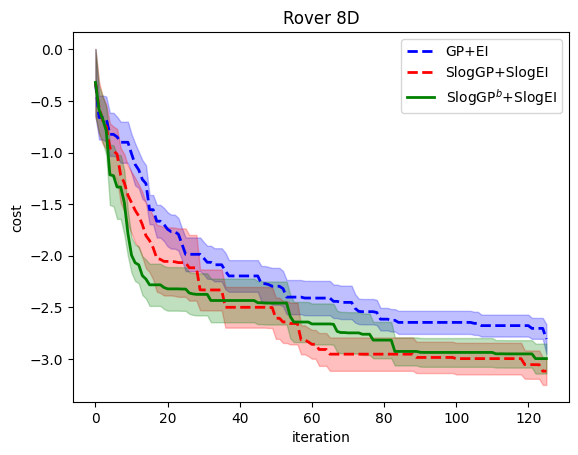

In [10]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
        
log_RegretMean_plot(BO_EI,fstar=0,label='GP+EI',color='blue',linestyle='--',error_bound=True)
# log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=False)
log_RegretMean_plot(LogEI_noboundary,fstar=0,label='SlogGP+SlogEI',color='red',linestyle='--',error_bound=True)
log_RegretMean_plot(LogEI_boundary,fstar=0,label='SlogGP$^b$+SlogEI',color='green',linestyle='-',error_bound=True)
#log_RegretMean_plot(LogTEI_boundary,fstar=0,label='SlogGP$^b$+SlogTEI',color='black',linestyle='-',error_bound=False)


# plt.yscale("log") 

plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Rover 8D')

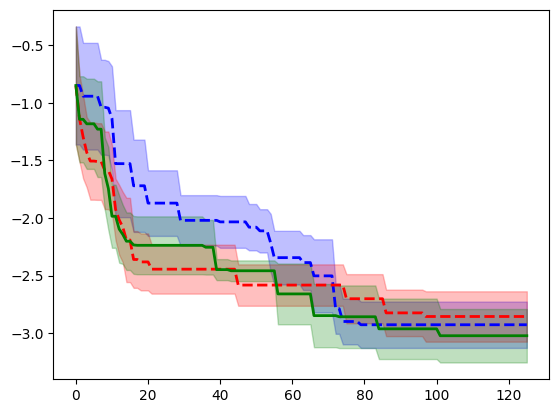

In [10]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
        
log_RegretMean_plot(BO_EI,fstar=0,label='GP+EI',color='blue',linestyle='--',error_bound=True)
# log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=False)
log_RegretMean_plot(LogEI_noboundary,fstar=0,label='SlogGP+SlogEI',color='red',linestyle='--',error_bound=True)
log_RegretMean_plot(LogEI_boundary,fstar=0,label='SlogGP$^b$+SlogEI',color='green',linestyle='-',error_bound=True)

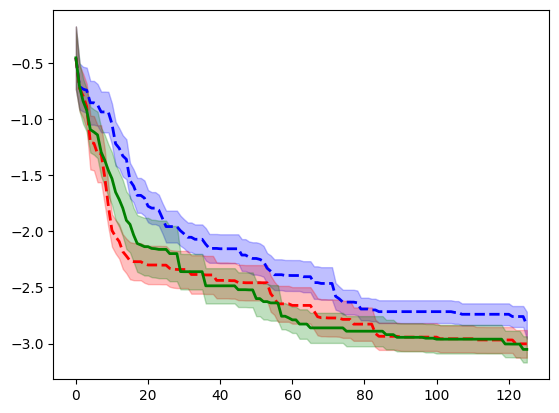

In [15]:
import os 
BO_EI = np.genfromtxt(os.path.join(os.getcwd(),'Rove8D_GP+EI'), delimiter=',')
LogEI_noboundary = np.genfromtxt(os.path.join(os.getcwd(),'Rove8D_SLogGP(boundary)+logEI'), delimiter=',')
LogEI_boundary = np.genfromtxt(os.path.join(os.getcwd(),'Rove8D_SLogGP+logEI'), delimiter=',')

log_RegretMean_plot(BO_EI,fstar=0,label='GP+EI',color='blue',linestyle='--',error_bound=True)
# log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=False)
log_RegretMean_plot(LogEI_noboundary,fstar=0,label='SlogGP+SlogEI',color='red',linestyle='--',error_bound=True)
log_RegretMean_plot(LogEI_boundary,fstar=0,label='SlogGP$^b$+SlogEI',color='green',linestyle='-',error_bound=True)

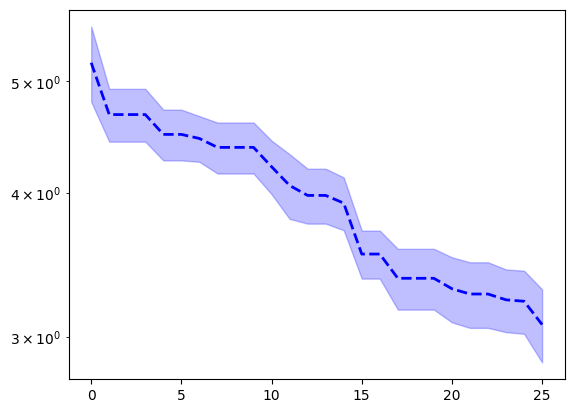

In [101]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   

log_RegretMean_plot(BO_EI,fstar=0,label='GP+EI',color='blue',linestyle='--',error_bound=True)     
# log_RegretMean_plot(LogEI_noboundary,fstar=fstar,label='SlogGP+SlogEI',color='red',linestyle='--',error_bound=True)
# log_RegretMean_plot(LogEI_boundary,fstar=fstar,label='SlogGP$^b$+SlogEI',color='green',linestyle='-',error_bound=True)

plt.yscale("log") 

Text(0.5, 1.0, 'Rover 8D')

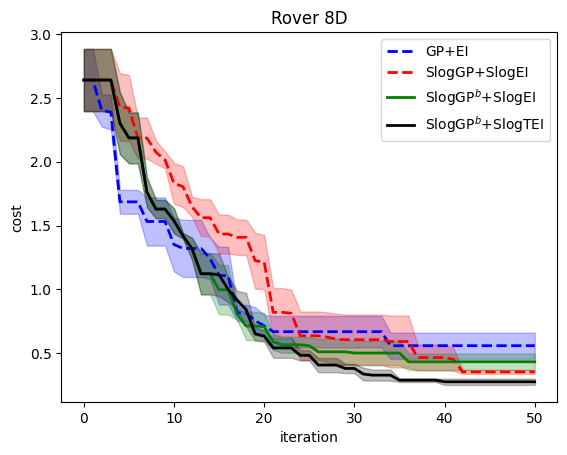

In [141]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
        
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='--',error_bound=True)
log_RegretMean_plot(LogEI_noboundary,fstar=fstar,label='SlogGP+SlogEI',color='red',linestyle='--',error_bound=True)
log_RegretMean_plot(LogEI_boundary,fstar=fstar,label='SlogGP$^b$+SlogEI',color='green',linestyle='-',error_bound=True)
log_RegretMean_plot(LogTEI_boundary,fstar=fstar,label='SlogGP$^b$+SlogTEI',color='black',linestyle='-',error_bound=True)


plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Rover 8D')

Text(0.5, 1.0, 'Rover 8D')

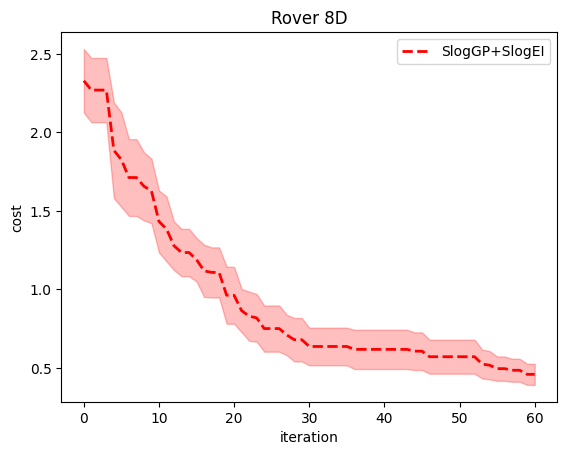

In [39]:
# log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='--',error_bound=True)
log_RegretMean_plot(LogEI_noboundary,fstar=fstar,label='SlogGP+SlogEI',color='red',linestyle='--',error_bound=True)
# log_RegretMean_plot(LogEI_boundary,fstar=fstar,label='SlogGP$^b$+SlogEI',color='green',linestyle='-',error_bound=True)
# log_RegretMean_plot(LogTEI_boundary,fstar=fstar,label='SlogGP$^b$+SlogTEI',color='black',linestyle='-',error_bound=True)


plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Rover 8D')

Text(0.5, 1.0, 'Rover 8D')

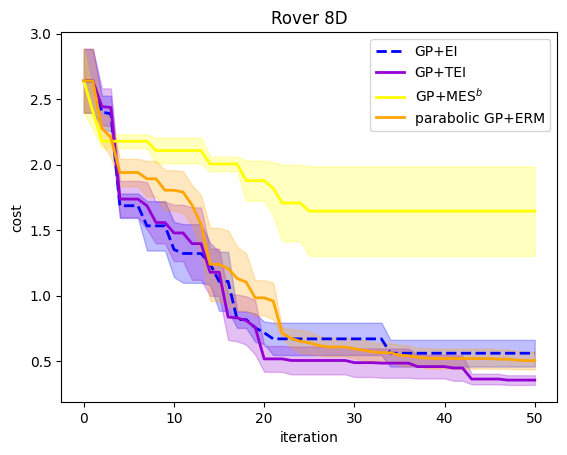

In [21]:
def log_RegretMean_plot(res,fstar,label,color,linestyle,error_bound=True):
    
    
    total_record = (np.array(res)-fstar)
    
    
    N = total_record.shape[0]
    
    std = np.std(total_record,axis=0)
    
    mean = np.mean(total_record,axis=0)
    
    median = np.median(total_record,axis=0)
    
    iter = np.array(range(mean.shape[0]))
    
    lower = mean - 1*std/np.sqrt(N)
    upper = mean + 1*std/np.sqrt(N)
    
    lower.astype(float)
    upper.astype(float)
    
    
    plt.plot(mean,linewidth=2,label=label,color=color,linestyle=linestyle)
    if error_bound:
        plt.fill_between(iter, lower, upper,alpha=0.25,color=color)   
        
log_RegretMean_plot(BO_EI,fstar=fstar,label='GP+EI',color='blue',linestyle='dashed',error_bound=True)
log_RegretMean_plot(BO_TEI,fstar=fstar,label='GP+TEI',color='darkviolet',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_MES,fstar=fstar,label='GP+MES$^b$',color='yellow',linestyle='-',error_bound=True)
log_RegretMean_plot(BO_ERM,fstar=fstar,label='parabolic GP+ERM',color='orange',linestyle='-',error_bound=True)


plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Rover 8D')